In [2]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib ipympl

from PIL import Image

from skimage.morphology import binary_erosion, binary_dilation, binary_opening, binary_closing

formato: TIFF
(ancho, alto) = (486, 486)
modo:  1


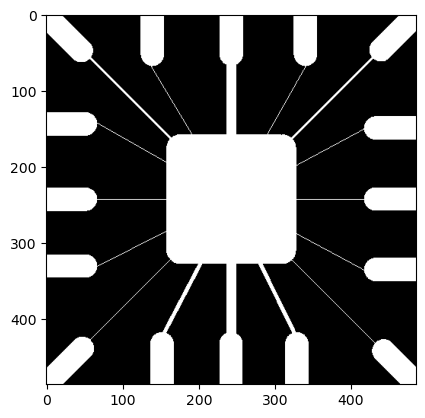

In [12]:
file = 'images/wirebond_mask.tif'
img  = Image.open(file)

print('formato:', img.format)
print('(ancho, alto) =', img.size)
print('modo: ', img.mode)

plt.imshow(img, cmap='gray')

In [13]:
se_sz1 = (11,11)
se_sz2 = (15,15)
se_sz3 = (45,45)

se1 = np.ones(se_sz1,dtype='bool')
se2 = np.ones(se_sz2,dtype='bool')
se3 = np.ones(se_sz3,dtype='bool')

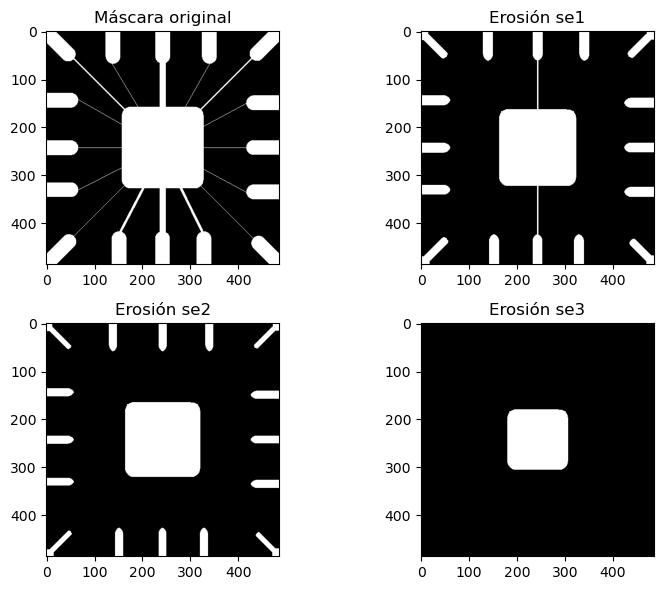

In [14]:

plt.figure(figsize=(8, 6))

plt.subplot(221)
plt.title('Máscara original')
plt.imshow(img, cmap='gray')

plt.subplot(222)
plt.title('Erosión se1')
plt.imshow(binary_erosion(np.array(img), se1), cmap='gray')

plt.subplot(223)
plt.title('Erosión se2')
plt.imshow(binary_erosion(np.array(img), se2), cmap='gray')

plt.subplot(224)
plt.title('Erosión se3')
plt.imshow(binary_erosion(np.array(img), se3), cmap='gray')
plt.tight_layout()

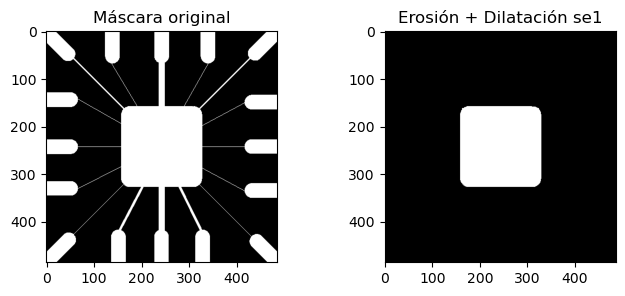

In [16]:
plt.figure(figsize=(8, 3))

plt.subplot(121)
plt.title('Máscara original')
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title('Erosión + Dilatación se1')
plt.imshow(binary_dilation(binary_erosion(np.array(img), se3),se3), cmap='gray')


formato: TIFF
(ancho, alto) = (508, 444)
modo:  1


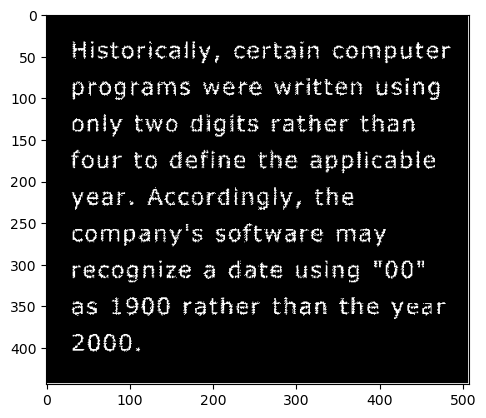

In [6]:
file = 'images/text_gaps.tif'
img  = Image.open(file)

print('formato:', img.format)
print('(ancho, alto) =', img.size)
print('modo: ', img.mode)

plt.imshow(img, cmap='gray')

In [10]:
se_ze = (3,3)

se = np.ones(se_ze, dtype='bool')
se[0,0] =0
se[0,2] =0
se[2,0] =0
se[2,2] =0

print(se)

[[False  True False]
 [ True  True  True]
 [False  True False]]


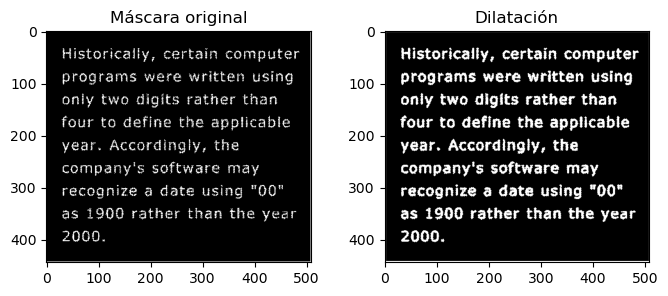

In [11]:
plt.figure(figsize=(8, 3))

plt.subplot(121)
plt.title('Máscara original')
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title('Dilatación')
plt.imshow(binary_dilation(np.array(img), se), cmap='gray')